In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import os 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_attrition = pd.read_csv("HR Employee Attrition.csv")
data_attrition.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data_attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Pre-pruning 
data_attrition.drop(columns=['Age', 'BusinessTravel', 'Department', 'Education', 'EducationField',
                            'EmployeeCount', 'StandardHours', 'StockOptionLevel', 'DistanceFromHome'
                            ,'JobInvolvement','MaritalStatus','Over18','TrainingTimesLastYear','OverTime'], axis=1, inplace=True)


In [6]:
data_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   DailyRate                 1470 non-null   int64 
 2   EmployeeNumber            1470 non-null   int64 
 3   EnvironmentSatisfaction   1470 non-null   int64 
 4   Gender                    1470 non-null   object
 5   HourlyRate                1470 non-null   int64 
 6   JobLevel                  1470 non-null   int64 
 7   JobRole                   1470 non-null   object
 8   JobSatisfaction           1470 non-null   int64 
 9   MonthlyIncome             1470 non-null   int64 
 10  MonthlyRate               1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  PercentSalaryHike         1470 non-null   int64 
 13  PerformanceRating         1470 non-null   int64 
 14  RelationshipSatisfaction

In [7]:
# Check Null Values 
data_attrition.isna().sum()


Attrition                   0
DailyRate                   0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [8]:
# Label and one hot encoding on Gender and Job Role
data_attrition['Gender']=data_attrition['Gender'].astype('category')
data_attrition['JobRole']=data_attrition['JobRole'].astype('category')
data_attrition['Gender']=data_attrition['Gender'].cat.codes
data_attrition['JobRole']=data_attrition['JobRole'].cat.codes

data_attrition=pd.get_dummies(data_attrition, columns=['Gender', 'JobRole'])

data_attrition.drop(columns=['Gender_0', 'JobRole_0'], axis=1, inplace=True)

In [9]:
data_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   DailyRate                 1470 non-null   int64 
 2   EmployeeNumber            1470 non-null   int64 
 3   EnvironmentSatisfaction   1470 non-null   int64 
 4   HourlyRate                1470 non-null   int64 
 5   JobLevel                  1470 non-null   int64 
 6   JobSatisfaction           1470 non-null   int64 
 7   MonthlyIncome             1470 non-null   int64 
 8   MonthlyRate               1470 non-null   int64 
 9   NumCompaniesWorked        1470 non-null   int64 
 10  PercentSalaryHike         1470 non-null   int64 
 11  PerformanceRating         1470 non-null   int64 
 12  RelationshipSatisfaction  1470 non-null   int64 
 13  TotalWorkingYears         1470 non-null   int64 
 14  WorkLifeBalance         

In [10]:
# Split Independent and dependent variables 
x=data_attrition.iloc[:,1:]
y=data_attrition.iloc[:,0:1]

In [11]:
x

,DailyRate,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,YearsWithCurrManager,Gender_1,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8
0,1102,1,2,94,2,4,5993,19479,8,11,...,5,0,0,0,0,0,0,0,1,0
1,279,2,3,61,2,2,5130,24907,1,23,...,7,1,0,0,0,0,0,1,0,0
2,1373,4,4,92,1,3,2090,2396,6,15,...,0,1,0,1,0,0,0,0,0,0
3,1392,5,4,56,1,3,2909,23159,1,11,...,0,0,0,0,0,0,0,1,0,0
4,591,7,1,40,1,2,3468,16632,9,12,...,2,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,884,2061,3,41,2,4,2571,12290,4,17,...,3,1,0,1,0,0,0,0,0,0
1466,613,2062,4,42,3,1,9991,21457,4,15,...,7,1,0,0,0,0,0,0,0,0
1467,155,2064,2,87,2,2,6142,5174,1,20,...,3,1,0,0,0,1,0,0,0,0
1468,1023,2065,4,63,2,2,5390,13243,2,14,...,8,1,0,0,0,0,0,0,1,0


In [12]:
y

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No
...,...
1465,No
1466,No
1467,No
1468,No


In [13]:
# Using Robust Scaler for preprocessing
from sklearn.preprocessing import RobustScaler
robo_scaler=RobustScaler()
x_scaled=robo_scaler.fit_transform(x)

In [14]:
# Checking balance or imbalance data 
data_attrition['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [15]:
# Rectify imbalance dataset by using SMOTE
from imblearn.over_sampling import SMOTE 
sampling=SMOTE()
X_resp, Y_resp=sampling.fit_resample(x_scaled,y)

In [16]:
Y_resp.value_counts()

Attrition
No           1233
Yes          1233
dtype: int64

<AxesSubplot:>

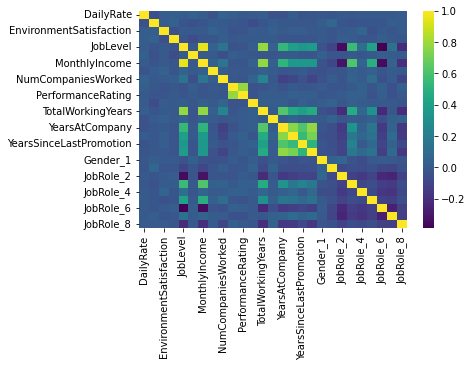

In [17]:
sns.heatmap(data_attrition.corr(), cmap='viridis')

In [18]:
# Splitting the data into test & train
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(X_resp,Y_resp, test_size=0.25, random_state=101)

In [19]:
print(xtrain.shape,ytrain.shape)

(1849, 27) (1849, 1)


In [20]:
# Applying Logistic Regression 
from sklearn.linear_model import LogisticRegression
logisticreg= LogisticRegression()
logisticreg.fit(xtrain, ytrain)


LogisticRegression()

In [21]:
ypred_test=logisticreg.predict(xtest)
ypred_train=logisticreg.predict(xtrain)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(ypred_train, ytrain))
print("###################################")
print(accuracy_score(ypred_test, ytest))

0.7420227149810709
###################################
0.713128038897893


In [23]:
# Lets improvise our model and use Random Forest
# Using Random Forest
from sklearn.ensemble import RandomForestClassifier
random_class=RandomForestClassifier(n_estimators=1000, criterion='gini')
random_class.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

In [24]:
ypred_test_rf=random_class.predict(xtest)
ypred_train_rf=random_class.predict(xtrain)

In [25]:
print(f'Train Accuracy-{accuracy_score(ypred_train_rf, ytrain)}')
print("###################################")
print(f'Test Accuracy-{accuracy_score(ypred_test_rf, ytest)}')

Train Accuracy-1.0
###################################
Test Accuracy-0.9205834683954619


In [26]:
print(classification_report(ytest, ypred_test_rf))

              precision    recall  f1-score   support

          No       0.91      0.94      0.92       318
         Yes       0.93      0.90      0.92       299

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617



In [27]:
print(confusion_matrix(ytest, ypred_test_rf))

[[299  19]
 [ 30 269]]


In [28]:
# Using KFOLD to increase more accuracy
from sklearn.model_selection import cross_val_score
cvs_test= cross_val_score(random_class, xtest, ytest, cv=15)

In [29]:
# Final Accuracies-:
print(f'Train Accuracy-{accuracy_score(ypred_train_rf, ytrain)}')
print(f'Test Accuracy-{cvs_test.max()}')

Train Accuracy-1.0
Test Accuracy-0.9512195121951219
